In [1]:
from glob import glob
import os
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import re


In [2]:
en_path = 'GAMEDATA/GenshinData/Subtitle/EN'
ja_path = 'GAMEDATA/GenshinData/Subtitle/JP'
zh_path = 'GAMEDATA/GenshinData/Subtitle/CHS'

skip_count = 0
en_files, ja_files, zh_files = [], [], []
for zh_file in tqdm(os.listdir(zh_path), total=len(os.listdir(zh_path))):
    en_file = os.path.join(en_path, zh_file.replace('CHS', 'EN'))
    ja_file = os.path.join(ja_path, zh_file.replace('CHS', 'JP'))
    zh_file = os.path.join(zh_path, zh_file)
    if not os.path.exists(en_file) or not os.path.exists(ja_file):
        skip_count += 1
        continue

    en_files.append(en_file)
    ja_files.append(ja_file)
    zh_files.append(zh_file)

print(f'Skip {skip_count} files, {len(en_files)} files left.')

/tmp/ipykernel_5705/2870086666.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for zh_file in tqdm(os.listdir(zh_path), total=len(os.listdir(zh_path))):


  0%|          | 0/218 [00:00<?, ?it/s]

Skip 8 files, 210 files left.


In [3]:
# remove time stamp in srt
time_regex = re.compile(r'\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}')

df = pd.DataFrame(columns=['en', 'ja', 'zh'])

skip_count = 0
for en_file, ja_file, zh_file in tqdm(zip(en_files, ja_files, zh_files), total=len(en_files)):
    en_text, ja_text, zh_text = [], [], []
    for line in open(en_file, 'r', encoding='utf-8'):
        line = line.strip()
        if line == '':
            continue
        if time_regex.match(line):
            continue
        if line.isdigit():
            continue
        en_text.append(line)
    for line in open(ja_file, 'r', encoding='utf-8'):
        line = line.strip()
        if line == '':
            continue
        if time_regex.match(line):
            continue
        if line.isdigit():
            continue
        ja_text.append(line)
    for line in open(zh_file, 'r', encoding='utf-8'):
        line = line.strip()
        if line == '':
            continue
        if time_regex.match(line):
            continue
        if line.isdigit():
            continue
        zh_text.append(line)

    if len(en_text) != len(ja_text) or len(en_text) != len(zh_text):
        skip_count += 1
        continue
    df = pd.concat([df, pd.DataFrame({'en': en_text, 'ja': ja_text, 'zh': zh_text})], ignore_index=True)

print(f'Skip {skip_count} files')
df

/tmp/ipykernel_5705/1350593726.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for en_file, ja_file, zh_file in tqdm(zip(en_files, ja_files, zh_files), total=len(en_files)):


  0%|          | 0/210 [00:00<?, ?it/s]

Skip 143 files


,en,ja,zh
0,"Once, there was a glorious kingdom established...",かつて 天空には栄光の王国があった,曾经，天上有一个荣光的王国。
1,"From that kingdom came a crowned heir, tasked ...",国王は 王位継承者第一位に暗黒の国へと行き 創世の真珠を探すよう命じた,那国王派遣第一位王储去黑暗之国寻找创世的珍珠。
2,The first crowned heir began her journey of se...,こうして かの者は真珠を探す旅に出た,于是第一位王储走上了珍珠的追寻之路。
3,"But she was deceived, and the memory of her no...",しかし彼女は騙され 自身の高貴さを忘れてしまう,但她却被欺骗，忘记了自己的高贵，
4,She now believed that she was the queen of the...,そして 自らを暗黒の国の王女だと思い込むようになった,以为自己是黑暗之国的王。
...,...,...,...
737,But the Lyre could no longer soothe his cries,天空のライアーは 話せなくなった,天空之琴却已没有办法说话
738,Aether!,空！,空！
739,"Wait, don't go!",待って…どうするつもり！,等等…别走！
740,Give my brother back!,よくも私のお兄ちゃんを——,把我的哥哥——


In [4]:
# drop duplicate
df = df.drop_duplicates(subset=['en', 'ja', 'zh'], keep='first')
df

,en,ja,zh
0,"Once, there was a glorious kingdom established...",かつて 天空には栄光の王国があった,曾经，天上有一个荣光的王国。
1,"From that kingdom came a crowned heir, tasked ...",国王は 王位継承者第一位に暗黒の国へと行き 創世の真珠を探すよう命じた,那国王派遣第一位王储去黑暗之国寻找创世的珍珠。
2,The first crowned heir began her journey of se...,こうして かの者は真珠を探す旅に出た,于是第一位王储走上了珍珠的追寻之路。
3,"But she was deceived, and the memory of her no...",しかし彼女は騙され 自身の高貴さを忘れてしまう,但她却被欺骗，忘记了自己的高贵，
4,She now believed that she was the queen of the...,そして 自らを暗黒の国の王女だと思い込むようになった,以为自己是黑暗之国的王。
...,...,...,...
645,*sigh* What a shame,…実に遺憾だ,…令人遗憾
666,Aether!,空！,空！
667,"Wait, don't go!",待って…どうするつもり！,等等…别走！
668,Give my brother back!,よくも私のお兄ちゃんを——,把我的哥哥——


In [5]:
# remove row with only punctuation
df = df[~df['en'].str.match(r'^[^\w\s]+$')]
df = df[~df['ja'].str.match(r'^[^\w\s]+$')]
df = df[~df['zh'].str.match(r'^[^\w\s]+$')]
df

,en,ja,zh
0,"Once, there was a glorious kingdom established...",かつて 天空には栄光の王国があった,曾经，天上有一个荣光的王国。
1,"From that kingdom came a crowned heir, tasked ...",国王は 王位継承者第一位に暗黒の国へと行き 創世の真珠を探すよう命じた,那国王派遣第一位王储去黑暗之国寻找创世的珍珠。
2,The first crowned heir began her journey of se...,こうして かの者は真珠を探す旅に出た,于是第一位王储走上了珍珠的追寻之路。
3,"But she was deceived, and the memory of her no...",しかし彼女は騙され 自身の高貴さを忘れてしまう,但她却被欺骗，忘记了自己的高贵，
4,She now believed that she was the queen of the...,そして 自らを暗黒の国の王女だと思い込むようになった,以为自己是黑暗之国的王。
...,...,...,...
644,Before letting out a long sigh,長い溜息をついた,留下一声长叹
645,*sigh* What a shame,…実に遺憾だ,…令人遗憾
666,Aether!,空！,空！
667,"Wait, don't go!",待って…どうするつもり！,等等…别走！


In [6]:
# remove lines with only numbers
df = df[~df['en'].str.match(r'^\d+$')]
df = df[~df['ja'].str.match(r'^\d+$')]
df = df[~df['zh'].str.match(r'^\d+$')]
df

,en,ja,zh
0,"Once, there was a glorious kingdom established...",かつて 天空には栄光の王国があった,曾经，天上有一个荣光的王国。
1,"From that kingdom came a crowned heir, tasked ...",国王は 王位継承者第一位に暗黒の国へと行き 創世の真珠を探すよう命じた,那国王派遣第一位王储去黑暗之国寻找创世的珍珠。
2,The first crowned heir began her journey of se...,こうして かの者は真珠を探す旅に出た,于是第一位王储走上了珍珠的追寻之路。
3,"But she was deceived, and the memory of her no...",しかし彼女は騙され 自身の高貴さを忘れてしまう,但她却被欺骗，忘记了自己的高贵，
4,She now believed that she was the queen of the...,そして 自らを暗黒の国の王女だと思い込むようになった,以为自己是黑暗之国的王。
...,...,...,...
644,Before letting out a long sigh,長い溜息をついた,留下一声长叹
645,*sigh* What a shame,…実に遺憾だ,…令人遗憾
666,Aether!,空！,空！
667,"Wait, don't go!",待って…どうするつもり！,等等…别走！


In [7]:
# remove lines that tokens is more than 256 or less than 1
from transformers import MT5TokenizerFast
tokenizer = MT5TokenizerFast.from_pretrained('google/mt5-small')

df['en_len'] = df['en'].apply(lambda x: len(tokenizer.tokenize(x)))
df['ja_len'] = df['ja'].apply(lambda x: len(tokenizer.tokenize(x)))
df['zh_len'] = df['zh'].apply(lambda x: len(tokenizer.tokenize(x)))
df

/home/toshihiko/anaconda3/envs/pytorch201/lib/python3.8/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


,en,ja,zh,en_len,ja_len,zh_len
0,"Once, there was a glorious kingdom established...",かつて 天空には栄光の王国があった,曾经，天上有一个荣光的王国。,19,9,11
1,"From that kingdom came a crowned heir, tasked ...",国王は 王位継承者第一位に暗黒の国へと行き 創世の真珠を探すよう命じた,那国王派遣第一位王储去黑暗之国寻找创世的珍珠。,29,27,21
2,The first crowned heir began her journey of se...,こうして かの者は真珠を探す旅に出た,于是第一位王储走上了珍珠的追寻之路。,19,11,15
3,"But she was deceived, and the memory of her no...",しかし彼女は騙され 自身の高貴さを忘れてしまう,但她却被欺骗，忘记了自己的高贵，,17,10,15
4,She now believed that she was the queen of the...,そして 自らを暗黒の国の王女だと思い込むようになった,以为自己是黑暗之国的王。,16,14,10
...,...,...,...,...,...,...
644,Before letting out a long sigh,長い溜息をついた,留下一声长叹,10,6,5
645,*sigh* What a shame,…実に遺憾だ,…令人遗憾,9,5,4
666,Aether!,空！,空！,3,3,3
667,"Wait, don't go!",待って…どうするつもり！,等等…别走！,7,6,6


In [8]:
df = df[df['en_len'] <= 256]
df = df[df['ja_len'] <= 256]
df = df[df['zh_len'] <= 256]
df = df[df['en_len'] >= 1]
df = df[df['ja_len'] >= 1]
df = df[df['zh_len'] >= 1]
df

,en,ja,zh,en_len,ja_len,zh_len
0,"Once, there was a glorious kingdom established...",かつて 天空には栄光の王国があった,曾经，天上有一个荣光的王国。,19,9,11
1,"From that kingdom came a crowned heir, tasked ...",国王は 王位継承者第一位に暗黒の国へと行き 創世の真珠を探すよう命じた,那国王派遣第一位王储去黑暗之国寻找创世的珍珠。,29,27,21
2,The first crowned heir began her journey of se...,こうして かの者は真珠を探す旅に出た,于是第一位王储走上了珍珠的追寻之路。,19,11,15
3,"But she was deceived, and the memory of her no...",しかし彼女は騙され 自身の高貴さを忘れてしまう,但她却被欺骗，忘记了自己的高贵，,17,10,15
4,She now believed that she was the queen of the...,そして 自らを暗黒の国の王女だと思い込むようになった,以为自己是黑暗之国的王。,16,14,10
...,...,...,...,...,...,...
644,Before letting out a long sigh,長い溜息をついた,留下一声长叹,10,6,5
645,*sigh* What a shame,…実に遺憾だ,…令人遗憾,9,5,4
666,Aether!,空！,空！,3,3,3
667,"Wait, don't go!",待って…どうするつもり！,等等…别走！,7,6,6


In [9]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
import numpy as np
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/LaBSE').cuda()

_batch, _scores = [], []
_bs = 64
for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):
    inputs = [row.en, row.ja, row.zh]
    _batch.extend(inputs)
    if (i + 1) % _bs == 0 or i == df.shape[0] - 1:
        embeddings = model.encode(_batch)
        # calculate score between each pair
        for j in range(embeddings.shape[0] // 3):
            _scores.append(np.average([
                np.matmul(embeddings[j * 3], embeddings[j * 3 + 1].T),
                np.matmul(embeddings[j * 3], embeddings[j * 3 + 2].T),
                np.matmul(embeddings[j * 3 + 1], embeddings[j * 3 + 2].T)
            ]))
        _batch = []
df = df.assign(score=_scores)
df

/tmp/ipykernel_5705/3787246084.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):


  0%|          | 0/359 [00:00<?, ?it/s]

,en,ja,zh,en_len,ja_len,zh_len,score
0,"Once, there was a glorious kingdom established...",かつて 天空には栄光の王国があった,曾经，天上有一个荣光的王国。,19,9,11,0.791986
1,"From that kingdom came a crowned heir, tasked ...",国王は 王位継承者第一位に暗黒の国へと行き 創世の真珠を探すよう命じた,那国王派遣第一位王储去黑暗之国寻找创世的珍珠。,29,27,21,0.650342
2,The first crowned heir began her journey of se...,こうして かの者は真珠を探す旅に出た,于是第一位王储走上了珍珠的追寻之路。,19,11,15,0.639133
3,"But she was deceived, and the memory of her no...",しかし彼女は騙され 自身の高貴さを忘れてしまう,但她却被欺骗，忘记了自己的高贵，,17,10,15,0.726780
4,She now believed that she was the queen of the...,そして 自らを暗黒の国の王女だと思い込むようになった,以为自己是黑暗之国的王。,16,14,10,0.634188
...,...,...,...,...,...,...,...
644,Before letting out a long sigh,長い溜息をついた,留下一声长叹,10,6,5,0.463413
645,*sigh* What a shame,…実に遺憾だ,…令人遗憾,9,5,4,0.592082
666,Aether!,空！,空！,3,3,3,0.762621
667,"Wait, don't go!",待って…どうするつもり！,等等…别走！,7,6,6,0.745137


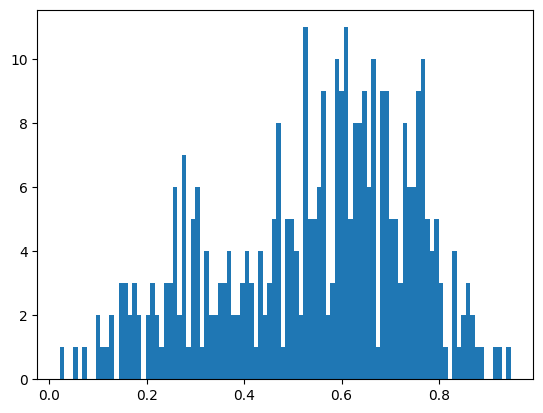

In [10]:
# statistics score using matplotlib
import matplotlib.pyplot as plt
plt.hist(df['score'], bins=100)
plt.show()

In [11]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
df = df[df['score'] >= 0.6]
df = df[df['score'] <= 0.99]
df

,en,ja,zh,en_len,ja_len,zh_len,score
0,"Once, there was a glorious kingdom established...",かつて 天空には栄光の王国があった,曾经，天上有一个荣光的王国。,19,9,11,0.791986
1,"From that kingdom came a crowned heir, tasked ...",国王は 王位継承者第一位に暗黒の国へと行き 創世の真珠を探すよう命じた,那国王派遣第一位王储去黑暗之国寻找创世的珍珠。,29,27,21,0.650342
2,The first crowned heir began her journey of se...,こうして かの者は真珠を探す旅に出た,于是第一位王储走上了珍珠的追寻之路。,19,11,15,0.639133
3,"But she was deceived, and the memory of her no...",しかし彼女は騙され 自身の高貴さを忘れてしまう,但她却被欺骗，忘记了自己的高贵，,17,10,15,0.726780
4,She now believed that she was the queen of the...,そして 自らを暗黒の国の王女だと思い込むようになった,以为自己是黑暗之国的王。,16,14,10,0.634188
...,...,...,...,...,...,...,...
640,Alright,それもよい,也好,2,3,3,0.747554
643,"After putting down his hagoita, Kamai remained...",鎌井様は羽子板を置いてしばらく黙り込み,放下羽子板后，镰井先生沉默许久,20,11,15,0.704898
666,Aether!,空！,空！,3,3,3,0.762621
667,"Wait, don't go!",待って…どうするつもり！,等等…别走！,7,6,6,0.745137


In [12]:
# replace「」to “”, 『』to ‘’ in zh
df['zh'] = df['zh'].apply(lambda x: x.replace('「', '“'))
df['zh'] = df['zh'].apply(lambda x: x.replace('」', '”'))
df['zh'] = df['zh'].apply(lambda x: x.replace('『', '‘'))
df['zh'] = df['zh'].apply(lambda x: x.replace('』', '’'))
df

,en,ja,zh,en_len,ja_len,zh_len,score
0,"Once, there was a glorious kingdom established...",かつて 天空には栄光の王国があった,曾经，天上有一个荣光的王国。,19,9,11,0.791986
1,"From that kingdom came a crowned heir, tasked ...",国王は 王位継承者第一位に暗黒の国へと行き 創世の真珠を探すよう命じた,那国王派遣第一位王储去黑暗之国寻找创世的珍珠。,29,27,21,0.650342
2,The first crowned heir began her journey of se...,こうして かの者は真珠を探す旅に出た,于是第一位王储走上了珍珠的追寻之路。,19,11,15,0.639133
3,"But she was deceived, and the memory of her no...",しかし彼女は騙され 自身の高貴さを忘れてしまう,但她却被欺骗，忘记了自己的高贵，,17,10,15,0.726780
4,She now believed that she was the queen of the...,そして 自らを暗黒の国の王女だと思い込むようになった,以为自己是黑暗之国的王。,16,14,10,0.634188
...,...,...,...,...,...,...,...
640,Alright,それもよい,也好,2,3,3,0.747554
643,"After putting down his hagoita, Kamai remained...",鎌井様は羽子板を置いてしばらく黙り込み,放下羽子板后，镰井先生沉默许久,20,11,15,0.704898
666,Aether!,空！,空！,3,3,3,0.762621
667,"Wait, don't go!",待って…どうするつもり！,等等…别走！,7,6,6,0.745137


In [13]:
# drop len and score column
df = df.drop(columns=['en_len', 'ja_len', 'zh_len', 'score'])
# save to parquet
df.to_parquet('parquet/GenshinSubtitle.parquet', index=False)

In [14]:
# load parquet
df = pd.read_parquet('parquet/GenshinSubtitle.parquet')
df

,en,ja,zh
0,"Once, there was a glorious kingdom established...",かつて 天空には栄光の王国があった,曾经，天上有一个荣光的王国。
1,"From that kingdom came a crowned heir, tasked ...",国王は 王位継承者第一位に暗黒の国へと行き 創世の真珠を探すよう命じた,那国王派遣第一位王储去黑暗之国寻找创世的珍珠。
2,The first crowned heir began her journey of se...,こうして かの者は真珠を探す旅に出た,于是第一位王储走上了珍珠的追寻之路。
3,"But she was deceived, and the memory of her no...",しかし彼女は騙され 自身の高貴さを忘れてしまう,但她却被欺骗，忘记了自己的高贵，
4,She now believed that she was the queen of the...,そして 自らを暗黒の国の王女だと思い込むようになった,以为自己是黑暗之国的王。
...,...,...,...
163,Alright,それもよい,也好
164,"After putting down his hagoita, Kamai remained...",鎌井様は羽子板を置いてしばらく黙り込み,放下羽子板后，镰井先生沉默许久
165,Aether!,空！,空！
166,"Wait, don't go!",待って…どうするつもり！,等等…别走！
